# Aula 1

## Introdução ao OCR

### Como o OCR funciona?
* Aquisição da imagem
* Pré-processamento
* Reconhecimento de texto
  - Reconhecimento de padrões
  - Detecção de recursos
* Pós-processamento



Existem diversas ferramentas disponíveis para serem utilizadas e nós vamos utilizar o [`pytesseract`](https://pypi.org/project/pytesseract/), que é uma biblioteca do Python que permite com que possamos utilizar o [`Tesseract OCR`](https://tesseract-ocr.github.io/), que é um recurso open source da Google e funciona com a OCR Engine. Por ser um recurso open source tem um [`repositório no GitHub`](https://github.com/tesseract-ocr/tesseract), e mais de 100 línguas no seu vocabulário, além de ser possível fazer com que ele aprenda novas linguagens.

## OCR no Colab

As bibliotecas não são instaladas previamente no Google Colaboratory, então é necessário que a instalação seja feita utilizando o pip.



```
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9
```

E os dados utilizados no curso serão importados utilizando o `!git clone` da pasta [`text-recognize`](https://github.com/sthemonica/text-recognize), afim de facilitar a importação de arquivos.

In [1]:
import pytesseract
import numpy as np
import cv2

import os
os.environ['TESSDATA_PREFIX'] = '../../tessdata/'

import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import re

In [ ]:
print(pytesseract.__version__)
print(cv2.__version__)

In [ ]:
img = cv2.imread('../../Imagens/Aula1-teste.png')
cv2.imshow('Aula 1', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
texto = pytesseract.image_to_string(img)
print(texto)

## Imagens BGR


O OpenCV tem seus canais de cores invertidos, então para utilizarmos com outras bibliotecas precisamos fazer a conversão de BGR para RGB. 
Existem outros tipos de conversões que podem ser feitas e a lista pode ser acessada no site da [documentação do OpenCV](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html).

In [ ]:
img = cv2.imread('../../Imagens/Aula1-ocr.png')
cv2.imshow('Aula 1', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imshow('Aula 1', rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Aula 1', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
texto_img = pytesseract.image_to_string(img)
print(texto_img)

texto_rgb = pytesseract.image_to_string(rgb)
print(texto_rgb)

texto_gray = pytesseract.image_to_string(gray)
print(texto_gray)

# Aula 2

## Caracteres diferentes

In [ ]:
img = cv2.imread('../../Imagens/Aula2-undersampling.png')
# cv2.imshow('Aula 1', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
texto = pytesseract.image_to_string(rgb)
print(texto)

As palavras **frequência** e **observações** não conseguiram ser traduzidas de uma forma boa o suficiente, o que nos faz pensar que o Tesseract está com algum problema e vamos verificar quais as listas de línguas que estão instaladas atualmente no sistema para auxiliar na leitura das nossas imagens, para isso usamos:

```
!tesseract --list-langs
```

In [ ]:
# !sudo apt install tesseract-ocr-por

In [ ]:
# import os
# os.environ['TESSDATA_PREFIX'] = '../../tessdata/'

```
# PORTUGUÊS
# ---------
wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
```
ou
```
# English
# ---------
wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
```

In [ ]:
config_tesseract = f'--tessdata-dir {os.environ["TESSDATA_PREFIX"]}'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

Agora já temos o português instalado e podemos passar novamente a imagem e definir que ela seja "lida" pelo Tesseract usando o português, para isso contamos com o  método `lang`.

## PSM

Page Segmentation Mode (PSM) ou em uma tradução livre modos de segmentação de página.

In [ ]:
!tesseract --help-psm

In [ ]:
img = cv2.imread('../../Imagens/Aula2-trecho-livro.png')
cv2.imshow('Aula 1', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
config_tesseract = f'--tessdata-dir {os.environ["TESSDATA_PREFIX"]} --psm 6'
texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
print(texto)

In [ ]:
img = cv2.imread('../../Imagens/Aula2-Saida.png')
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL )
config_tesseract = f'--tessdata-dir {os.environ["TESSDATA_PREFIX"]} --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

In [ ]:
img = cv2.imread('../../Imagens/Aula2_NotaFiscalExercicio.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

config_tesseract = f'--tessdata-dir {os.environ["TESSDATA_PREFIX"]} --psm 4'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

## Biblioteca Pillow

Biblioteca Pillow, que é mais conhecida pelo seu nome antigo, **PIL**: Python Imaging Library. 

In [ ]:
# config_tesseract = f'--tessdata-dir {os.environ["TESSDATA_PREFIX"]}'

img = Image.open("../../Imagens/Aula2-livro.png")
plt.imshow(img);

**Método utilizado:**

```
pytesseract.image_to_osd()
```


OSD significa Orientation and Script Detection e o seu retorno são os "metadados" da imagem.

In [ ]:
# print(pytesseract.image_to_osd(img))

# Aula 3

## Selecionando textos

In [ ]:
# from pytesseract import Output

img = cv2.imread('../../Imagens/Aula3-testando.png')
# cv2.imshow('Aula 3', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

config_tesseract = f'--tessdata-dir {os.environ["TESSDATA_PREFIX"]}'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=pytesseract.Output.DICT)
resultado
# texto     = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract, output_type=pytesseract.Output.DICT)
# print(texto)

In [2]:
min_conf_slider = widgets.FloatSlider(
    value=40,
    min=0,
    max=100,
    description='min_conf'
)

display(min_conf_slider)

vermelho = widgets.FloatSlider(
    value=60,
    min=0,
    max=100,
    description='vermelho menor que: '
)

display(vermelho)

amarelo = widgets.FloatSlider(
    value=80,
    min=0,
    max=100,
    description='amarelo menor que: '
)

display(amarelo)

FloatSlider(value=40.0, description='min_conf')

FloatSlider(value=60.0, description='vermelho menor que: ')

FloatSlider(value=80.0, description='amarelo menor que: ')

In [ ]:
print(min_conf_slider.value)

## Caixa delimitadora

In [ ]:
fonte = '../../Imagens/calibri.ttf'

def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
    fonte = ImageFont.truetype(fonte, tamanho_texto)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - tamanho_texto), texto, font = fonte, fill=(0,0,0))
    img = np.array(img_pil)
    return img

def caixa_texto(resultado, img, i, valor, cor = (255, 100, 0)):
    x = resultado['left'][i]
    y = resultado['top'][i]
    w = resultado['width'][i]
    h = resultado['height'][i]

    cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)
    
    # # Defina a posição e texto que você deseja adicionar
    texto = resultado['text'][i]
    # posicao_texto = (x, y-10)

    # Defina a fonte, escala, cor e espessura da linha
    fonte = cv2.FONT_HERSHEY_SIMPLEX
    escala = 0.5
    cor_texto = (0, 0, 0)  # Preto
    espessura = 1

    # Adicione o texto à imagem
    # cv2.putText(img, f'{valor}-{texto}', posicao_texto, fonte, escala, cor_texto, espessura)

    return x, y, img, texto


img_copia = rgb.copy()
for i in range(len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if (confianca/100) > (min_conf_slider.value/100):
        if (confianca/100) < (vermelho.value/100): #coloca a cor vermelha caso a confinça seja menor que 60%
            cor = (255,0,0)
        elif (confianca/100) < (amarelo.value/100): #coloca a cor amarela caso a confinça seja menor que 80%
            cor = (255,255,0)
        else:
            cor = (0,255,0)
             
        x, y, img, texto = caixa_texto(resultado, img_copia, i, str((confianca/100)), cor)
        texto_add = f'Confiança: {confianca/100}\n Texto: {texto}'
        img_copia = escreve_texto(texto_add, x, y-14, img, fonte, tamanho_texto=14)
        
plt.imshow(img_copia);

## Caixa e texto

## Fontes

## Função para fontes

# Aula 4

## Busca de informações

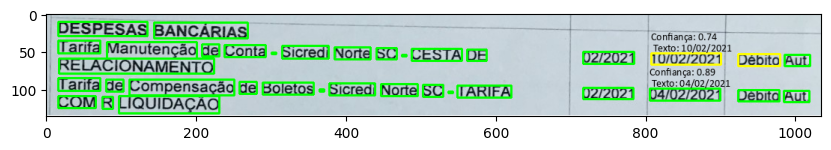

In [5]:
fonte = '../../Imagens/calibri.ttf'
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

img = cv2.imread("../../Imagens/Aula4-tabela_teste.png")

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

config_tesseract = f'--tessdata-dir {os.environ["TESSDATA_PREFIX"]}'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=pytesseract.Output.DICT)
resultado


# plt.imshow(rgb);

fonte = '../../Imagens/calibri.ttf'

def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
    fonte = ImageFont.truetype(fonte, tamanho_texto)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - tamanho_texto), texto, font = fonte, fill=(0,0,0))
    img = np.array(img_pil)
    return img

def caixa_texto(resultado, img, i, valor, cor = (255, 100, 0)):
    x = resultado['left'][i]
    y = resultado['top'][i]
    w = resultado['width'][i]
    h = resultado['height'][i]

    cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)
    
    # # Defina a posição e texto que você deseja adicionar
    texto = resultado['text'][i]
    # posicao_texto = (x, y-10)

    # Defina a fonte, escala, cor e espessura da linha
    fonte = cv2.FONT_HERSHEY_SIMPLEX
    escala = 0.5
    cor_texto = (0, 0, 0)  # Preto
    espessura = 1

    # Adicione o texto à imagem
    # cv2.putText(img, f'{valor}-{texto}', posicao_texto, fonte, escala, cor_texto, espessura)

    return x, y, img, texto


img_copia = rgb.copy()
for i in range(len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if (confianca/100) > (min_conf_slider.value/100):
        if (confianca/100) < (vermelho.value/100): #coloca a cor vermelha caso a confinça seja menor que 60%
            cor = (255,0,0)
        elif (confianca/100) < (amarelo.value/100): #coloca a cor amarela caso a confinça seja menor que 80%
            cor = (255,255,0)
        else:
            cor = (0,255,0)
             
        x, y, img, texto = caixa_texto(resultado, img_copia, i, str((confianca/100)), cor)
        texto_add = f'Confiança: {confianca/100}\n Texto: {texto}'
        
        if re.match(padrao_data, texto):
            img_copia = escreve_texto(texto_add, x, y-14, img, fonte, tamanho_texto=14)
        
plt.figure(figsize=(10, 8))

# Exiba a imagem na figura
plt.imshow(img_copia)

# Mostre a figura
plt.show()

## Destaque de informações

## Cenários naturais

## Falsos positivos